In [8]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

#### Initializing predictor and detector

In [2]:
pred_path = r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(pred_path)
detector = dlib.get_frontal_face_detector()

In [3]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

#### Get facial landmarks from the passed image

#### Plotting the landmarks on the image

In [51]:
def get_face_marks(image):
    rects = detector(image,1) ## returns the areas where image is detected

    if len(rects) >1 :
        print('Too Many Faces')
        raise TooManyFaces
    if len(rects) == 0:
        print('No Faces')
        raise NoFaces()

    return np.matrix([[p.x,p.y] for p in predictor(image,rects[0]).parts()]) ## returns a numpy array matrix
    

In [56]:
def annotate_marks(image,landmarks):
    image = image.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0,0],point[0,1])
        cv2.putText(image,str(idx),pos,
        fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale = 0.4, color = 255)
        cv2.circle(image,pos,3,color = (0,255,255))
    return image

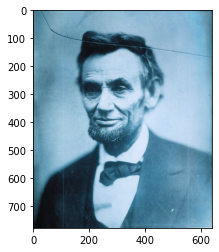

In [70]:
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\abraham.jpg')
plt.imshow(input_image)

In [71]:
landmarks = get_face_marks(input_image)


In [72]:
imgae_with_marks = annotate_marks(input_image,landmarks)

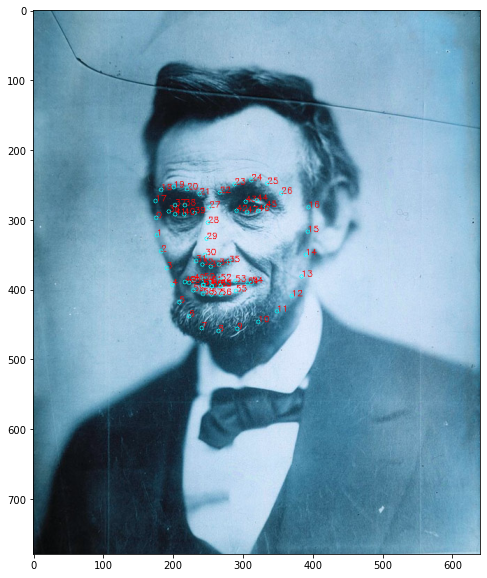

In [73]:
plt.figure(figsize = (12,10))
plt.imshow(imgae_with_marks)